# Projet de Fin d'Etudes : Mise en place d'un détecteur de fraude de carburant

## <font color='blue'> ------------------------------------**Données des bus CAN**---------------------------------------</font>


### <font color = "brown">I- Analyse, compréhension et prétraitement de données </font>

In [388]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [518]:
gp2_carburant = pd.read_csv('data/input-data/gp2_carburant.csv',delimiter=',',encoding='utf-8')
gp2_carburant.head(7)

,id,matricule,date,quantite,coutL,coutT,odometre,fournisseur,typePaiement,numPaiement,note,station
0,280,218,19/05/2022 11:04,46.78,2.095,98.0,440684,AGIL,carte N° 1407004717,NaN,Essence,HAFFOUZ
1,356,218,26/05/2022 19:48,47.73,2.095,100.0,441374,SHELL,carte N° 1407004717,NaN,Essence,SFAX RTE EL AIN
2,447,218,03/06/2022 13:04,50.60,2.095,106.0,442105,SHELL,carte N° 1407004717,NaN,Essence,SFAX RTE EL AIN
3,497,218,07/06/2022 17:28,27.21,2.095,57.0,442493,SHELL,carte N° 1407004717,NaN,Essence,SFAX RTE DE GABES PK 3
4,584,218,14/06/2022 17:41,45.35,2.095,95.0,443139,SHELL,carte N° 1407004717,NaN,Essence,SFAX RTE EL AIN
5,651,218,20/06/2022 18:02,47.73,2.095,100.0,443842,SHELL,carte N° 1407004717,NaN,Essence,SFAX RTE EL AIN
6,737,218,28/06/2022 16:27,47.73,2.095,100.0,444537,SHELL,carte N° 1407004717,NaN,Essence,SFAX RTE DE GABES PK 3


In [417]:
gp2_carburant.shape

(7907, 12)

<li> Taille de jeu de données : 7907 enregistrements et 12 caractéristiques </li>

### Liste de noms de colonnes

In [418]:
colonnes = gp2_carburant.columns
nbrcolonnes = len(gp2_carburant.columns)
print('Liste des caractéristiques dans le jeu de données \n', colonnes)
print('Nombre de caractéristiques dans le jeu de données : ', nbrcolonnes)

Liste des caractéristiques dans le jeu de données 
 Index(['id', 'matricule', 'date', 'quantite', 'coutL', 'coutT', 'odometre',
       'fournisseur', 'typePaiement', 'numPaiement', 'note', 'station'],
      dtype='object')
Nombre de caractéristiques dans le jeu de données :  12


### Vérification des données manquantes

In [419]:
print(gp2_carburant.isnull().sum())

id                 0
matricule          0
date               0
quantite           0
coutL              0
coutT              0
odometre           0
fournisseur        0
typePaiement       0
numPaiement     7907
note               0
station            0
dtype: int64


* Colonne numPaiement est remplie des valeurs manquantes, donc nous allons la supprimer.

In [498]:
gp2_carburant = gp2_carburant.drop(['numPaiement'],axis =1)

### Analyse des caractéristiques

####  <font color=blue>**Caractéristique : Odometre** </font>
Cette caractéristique continue à accumuler les kilo- mètres parcourus par le véhicule.

3190 enregistrements avec 0 comme valeur dans la colonne Odometre avec un pourcentage de :  40.34399898823827 %


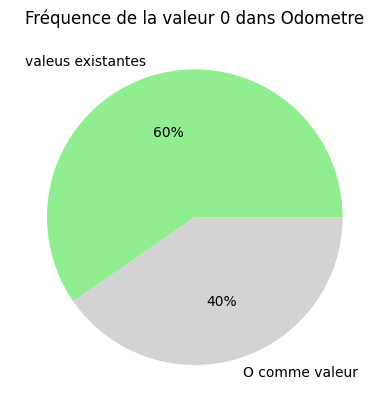

In [112]:
import matplotlib.pyplot as plt
import numpy as np

# La colonne odometre
freq_0 = gp2_carburant['odometre'].value_counts()[0]
freq = freq_0 * 100 / len(gp2_carburant)
print(freq_0,"enregistrements avec 0 comme valeur dans la colonne Odometre avec un pourcentage de : ",freq,"%")

couleurs = ['lightgreen', 'lightgrey']
plt.pie([100-freq,freq], autopct='%1.0f%%', colors = couleurs,labels = ['valeus existantes', 'O comme valeur']
)

plt.title('Fréquence de la valeur 0 dans Odometre', fontsize=12)

plt.show()

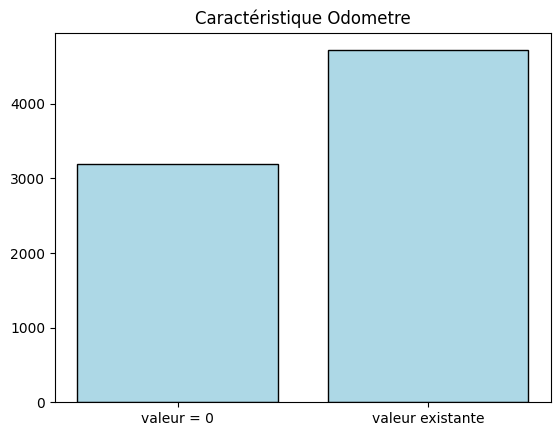

In [113]:
# Données à visualiser
valeurs = [freq_0,len(gp2_carburant)-freq_0]  # Exemple de valeurs pour l'histogramme

# Création de l'histogramme
plt.bar(['valeur = 0','valeur existante'],valeurs, color='lightblue', edgecolor='black')

# Ajout de titres et de labels
plt.title('Caractéristique Odometre')

# Affichage de l'histogramme
plt.show()

#### <li>La valeur 0 peut être due à un problème d'extraction des données provenant des bus CAN, donc nous allons la rejeter pour le moment. </li>

In [502]:
gp2_carburant = gp2_carburant.drop(['odometre'],axis =1)

####  <font color=blue>Caractéristiques : CoutT et CoutL et id </font>

* CoutT et CoutL indiquent respectivement le cout total et le cout par litre de carbruant
* ID c'est l'id d'une transaction dans la base de données.

In [501]:
gp2_carburant = gp2_carburant.drop(['coutT','coutL','id'],axis =1)
gp2_carburant.head()

,matricule,date,quantite,fournisseur,typePaiement,note,station
0,218,2022-05-19 11:04:00,46.78,AGIL,carte N° 1407004717,Essence,HAFFOUZ
1,218,2022-05-26 19:48:00,47.73,SHELL,carte N° 1407004717,Essence,SFAX RTE EL AIN
2,218,2022-06-03 13:04:00,50.60,SHELL,carte N° 1407004717,Essence,SFAX RTE EL AIN
3,218,2022-06-07 17:28:00,27.21,SHELL,carte N° 1407004717,Essence,SFAX RTE DE GABES PK 3
4,218,2022-06-14 17:41:00,45.35,SHELL,carte N° 1407004717,Essence,SFAX RTE EL AIN


=> Ces variables ne présentent pas d'importance pour nous, donc nous allons les supprimer.

####  <font color=blue>Caractéristique : Note (type_carburant) </font>

* Cette variable contient le type de carburant versée dans une transaction (gazoil, Essence...)
* Donc, pour une meilleure présentation et compréhension de cette variable dans ce qui suit, nous allons la renommer en **'type_carburant'**

In [520]:
# renommer la colonne note en type_carburant
gp2_carburant = gp2_carburant.rename(columns={'note': 'type_carburant'})

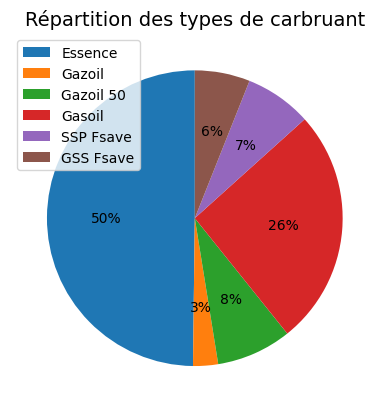

In [521]:
import matplotlib.pyplot as plt
import numpy as np

explode = ( 0, 0, 0, 0,0)

ax1 = gp2_carburant.groupby('type_carburant').size().plot(kind='pie', autopct='%1.0f%%', startangle=90,labels =None)
# Ajouter une légende
ax1.legend(labels=gp2_carburant['type_carburant'].unique())
plt.title('Répartition des types de carbruant', fontsize=14)

plt.show()

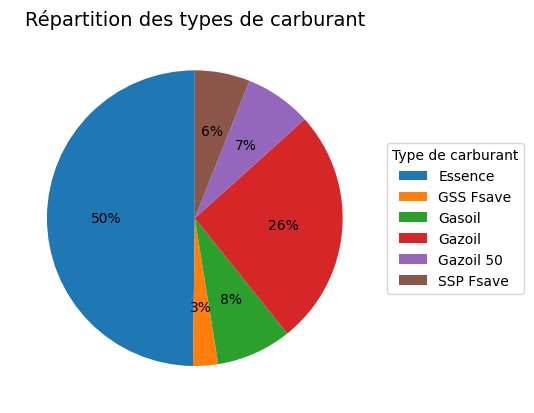

In [477]:
import matplotlib.pyplot as plt
import pandas as pd

# Exemple de création de DataFrame (si nécessaire)
# data = {'type_carburant': ['Diesel', 'Essence', 'Diesel', 'GPL', 'Essence', 'GPL', 'Diesel']}
# gp2_carburant = pd.DataFrame(data)

# Group by 'type_carburant' and count the occurrences
type_counts = gp2_carburant.groupby('type_carburant').size()

# Plotting the pie chart
fig, ax1 = plt.subplots()
ax1.pie(type_counts, autopct='%1.0f%%', startangle=90,labels= None)

# Ajouter une légende
ax1.legend(type_counts.index, title='Type de carburant', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

# Adding title
plt.title('Répartition des types de carburant', fontsize=14)

# Display the plot
plt.show()


* Nour remarquons qu'il existe le même type de carburant mais avec une différente notation de 'Gazoil' et 'Gasoil'
* Nous allons donc considérer que ces deux notations référencent le même type de carburant.
* **Changement à faire** : remplacer 'Gasoil' par 'Gazoil'

In [505]:
#fusionner
sub_gasoil = gp2_carburant[gp2_carburant['type_carburant'] == 'Gasoil']
sub_gasoil

,matricule,date,quantite,fournisseur,typePaiement,type_carburant,station
973,1139,NaT,340.78,SHELL,carte N° 1407023587,Gasoil,SFAX RTE DE GABES PK 3
6566,817372,NaT,12.29,SHELL,carte N° 1407022915,Gasoil,SFAX RTE DE MAHDIA
6567,837709,NaT,44.69,SHELL,carte N° 1407022917,Gasoil,SFAX RTE DE GABES PK 3
6568,817372,NaT,75.42,SHELL,carte N° 1407022915,Gasoil,SFAX RTE DE GABES PK 3
6569,837709,NaT,44.69,SHELL,carte N° 1407022917,Gasoil,SFAX RTE DE GABES PK 3
...,...,...,...,...,...,...,...
7902,192,NaT,25.19,SHELL,carte N° 1407077946,Gasoil,SFAX RTE MEL CHAKER
7903,192,NaT,40.30,SHELL,carte N° 1407077946,Gasoil,SFAX RTE MEL CHAKER
7904,192,NaT,47.36,SHELL,carte N° 1407077946,Gasoil,SFAX RTE MEL CHAKER
7905,192,NaT,30.23,SHELL,carte N° 1407077946,Gasoil,AKOUDA


In [506]:
gp2_carburant[gp2_carburant['type_carburant'] == 'Gazoil']


,matricule,date,quantite,fournisseur,typePaiement,type_carburant,station
21,218,2022-10-25 17:07:00,55.38,SHELL,carte N° 1407004717,Gazoil,SFAX RTE DE GABES PK 3
22,218,2022-11-02 14:59:00,55.91,SHELL,carte N° 1407004717,Gazoil,SFAX RTE EL AIN
23,218,2022-11-10 10:37:00,55.38,SHELL,carte N° 1407004717,Gazoil,SFAX RTE DE GABES PK 3
24,218,2022-11-25 10:37:00,55.42,SHELL,carte N° 1407004717,Gazoil,SFAX RTE DE GABES PK 3
25,218,2022-12-02 17:12:00,54.41,SHELL,carte N° 1407004717,Gazoil,SFAX RTE DE MAHDIA
...,...,...,...,...,...,...,...
6394,837709,NaT,90.68,SHELL,carte N° 1407022917,Gazoil,SFAX RTE DE GABES PK 3
6395,837709,NaT,75.57,SHELL,carte N° 1407022917,Gazoil,SFAX RTE DE GABES PK 3
6396,837709,NaT,22.67,SHELL,carte N° 1407022917,Gazoil,SFAX RTE DE GABES PK 3
6397,837709,NaT,95.72,SHELL,carte N° 1407022917,Gazoil,SFAX RTE DE GABES PK 3


In [456]:
#fusionner
gp2_carburant['type_carburant'].replace('Gasoil', 'Gazoil', inplace=True)

/var/folders/rr/2krd8f3127vdzr1f5q53tyzc0000gn/T/ipykernel_8810/745467611.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [457]:
#juste vérification
(gp2_carburant['type_carburant']  == 'Gasoil').sum()


np.int64(0)

#### Nouvelle répartition des types de carburant

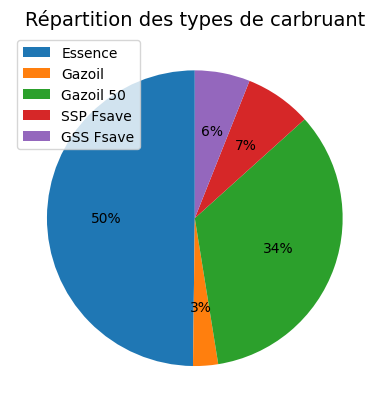

In [143]:
explode = ( 0, 0, 0, 0,0)

ax1 = gp2_carburant.groupby('type_carburant').size().plot(kind='pie', autopct='%1.0f%%', startangle=90,explode=explode,labels=None)
# Ajouter une légende
ax1.legend(labels=gp2_carburant['type_carburant'].unique(), loc="best")
plt.title('Répartition des types de carbruant', fontsize=14)

plt.show()

#### Exemple de fraude potentiel dans le type de carbruant utilisé par un véhicule


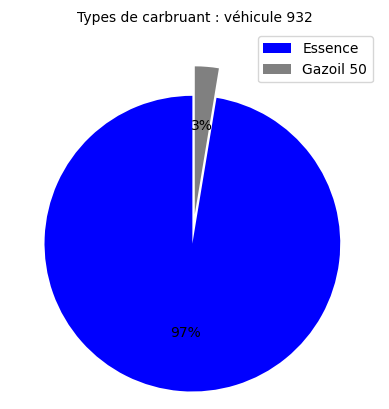

In [141]:
df_fraude = gp2_carburant[gp2_carburant['matricule'] == 932]
explode = (0.2, 0)  # on isole seulement la 4eme part
colors = ["blue","gray"]
ax = df_fraude.groupby('type_carburant').size().plot(kind='pie', autopct='%1.0f%%', startangle=90,
                                                     explode = explode,
                                                     colors =colors,
                                                     labels=None)

# Ajouter une légende
ax.legend(labels=df_fraude['type_carburant'].unique(), loc="best")

plt.title('Types de carbruant : véhicule 932', fontsize=10)
plt.show()

#### <li> On remarque que ce véhicule a utilisé parfois le Gazoil 50 ce qui peut mener à une utilisation frauduleuse de carburant pour des usages personnel par exemple. </li>

####  <font color=blue>Caractéristique : Matricule </font>

* Cette variable nous allons l'utiliser pour diviser les transactions selon matricule. En effet, nous allons traiter chaque données de véhicuel à part.


In [138]:
nbr = gp2_carburant['matricule'].unique()
print("Nous avons ",len(nbr),"véhicules distincts")

Nous avons  77 véhicules distincts


In [139]:
#nombre d'observation par véhicule
gp2_carburant['matricule'].value_counts()

matricule
1609      340
929       261
2530      246
2394      245
2544      235
         ... 
2483       11
475        10
192         9
817390      6
761         2
Name: count, Length: 77, dtype: int64

#### <font color = 'blue'>Caractéristique Date</font>
* La date présente la date et l’heure où la transaction de carburant est effectuée.

In [490]:
import pandas as pd

# Example DataFrame creation (if needed):
# data = {'date': ['2023-01-01', '2023-02-15', '2023-03-20', '2023-04-10', '2023-05-25']}
# test = pd.DataFrame(data)
# Converting 'date' column to datetime
gp2_carburant['date'] = pd.to_datetime(test['date'],format ="%d/%m/%Y %H:%M")

# Assuming 'test' is your DataFrame and it has a 'date' column
min_date = gp2_carburant['date'].min()
max_date = gp2_carburant['date'].max()

print(f"Min date: {min_date}")
print(f"Max date: {max_date}")

Min date: 2022-05-19 11:04:00
Max date: 2024-03-07 11:50:00


/var/folders/rr/2krd8f3127vdzr1f5q53tyzc0000gn/T/ipykernel_8810/128932927.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



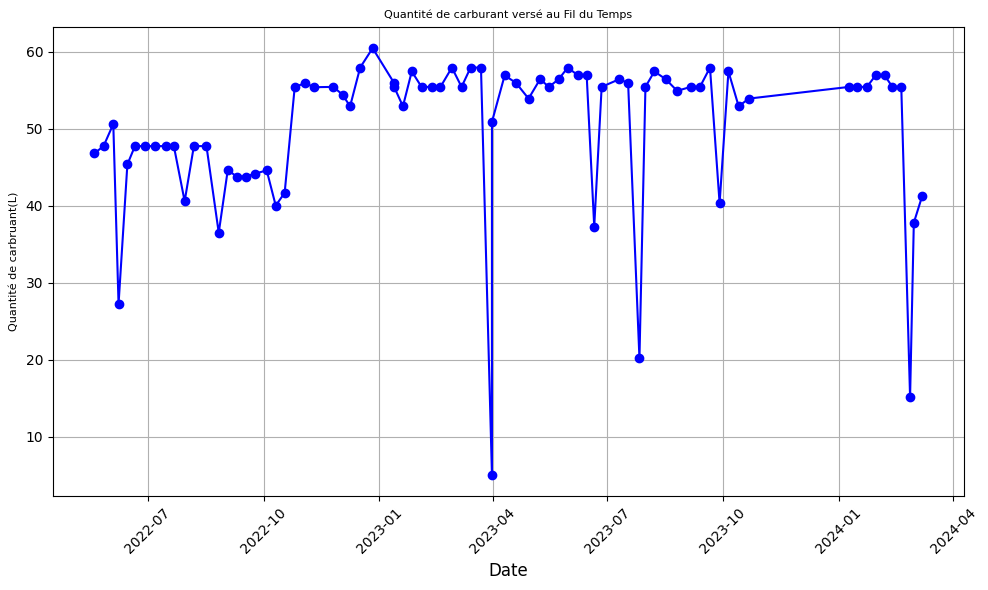

In [495]:
displaydata = gp2_carburant[gp2_carburant['matricule'] == 218]

#import matplotlib.pyplot as plt
#import pandas as pd

# Convert 'date' column to datetime
displaydata['date'] = pd.to_datetime(displaydata['date'])

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(displaydata['date'], displaydata['quantite'], marker='o', linestyle='-', color='blue')

# Adding title and labels
plt.title('Quantité de carburant versé au Fil du Temps', fontsize=8)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Quantité de carbruant(L)', fontsize=8)

# Rotate x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


#### <font color = 'blue'>Trouver la différence en jours entre les date consécutives - diff_date</font>

* Pour mieux exploiter la variable date, nous allons calculer les differences en jours pour chaque 2 trasactions consécutives pour chaque véhicule à part dans une nouvelle colonne **'diff_date'**.

* Cette nouvelle colonne calculée va nous permettre de détecter les transactions qui sont réalisées dns une très courte période ou le contraire.

**<u><font color ='orange'> Exemple** </font></u>

Nous pourrons détecter si un véhicule a réalisé plusieurs transactions dans le même jours, ou bien dans une période qui différe considérablement de sa  période fréquente ou période habituelle.

In [517]:

displaydata = displaydata.sort_values(by=['matricule', 'date'])

# Calculer la différence de date entre chaque transaction et la suivante pour chaque matricule
#gp2['difference_de_date'] = gp2.groupby('matricule')['date'].diff().dt.total_seconds()
#gp2 = gp2.dropna(subset=['difference_de_date'])

displaydata.head(33)

,id,matricule,date,quantite,coutL,coutT,odometre,fournisseur,typePaiement,numPaiement,note,station
0,280,218,2022-05-19 11:04:00,46.78,2.095,98.0,440684,AGIL,carte N° 1407004717,NaN,Essence,HAFFOUZ
1,356,218,2022-05-26 19:48:00,47.73,2.095,100.0,441374,SHELL,carte N° 1407004717,NaN,Essence,SFAX RTE EL AIN
2,447,218,2022-06-03 13:04:00,50.60,2.095,106.0,442105,SHELL,carte N° 1407004717,NaN,Essence,SFAX RTE EL AIN
3,497,218,2022-06-07 17:28:00,27.21,2.095,57.0,442493,SHELL,carte N° 1407004717,NaN,Essence,SFAX RTE DE GABES PK 3
4,584,218,2022-06-14 17:41:00,45.35,2.095,95.0,443139,SHELL,carte N° 1407004717,NaN,Essence,SFAX RTE EL AIN
5,651,218,2022-06-20 18:02:00,47.73,2.095,100.0,443842,SHELL,carte N° 1407004717,NaN,Essence,SFAX RTE EL AIN
6,737,218,2022-06-28 16:27:00,47.73,2.095,100.0,444537,SHELL,carte N° 1407004717,NaN,Essence,SFAX RTE DE GABES PK 3
7,838,218,2022-07-06 16:07:00,47.73,2.095,100.0,445199,SHELL,carte N° 1407004717,NaN,Essence,SFAX RTE EL AIN
8,925,218,2022-07-15 11:21:00,47.73,2.095,100.0,445858,SHELL,carte N° 1407004717,NaN,Essence,SFAX RTE DE MAHDIA
9,992,218,2022-07-21 16:14:00,47.73,2.095,100.0,446562,SHELL,carte N° 1407004717,NaN,Essence,SFAX RTE EL AIN


In [145]:
# Trouver la différence la plus fréquente
all_matricules = gp2['matricule']
all_matricules = all_matricules.unique()
new_dataframe = pd.DataFrame()

In [146]:
for mat in (all_matricules) :
    sub_data_frame = gp2[gp2['matricule'] == mat]
    # Trier les dates
    #sub_data_frame['date'] = pd.to_datetime(sub_data_frame['date'])

    dates = sub_data_frame['date']
    dates = dates.sort_values()

    # Calculer les différences entre les dates consécutives en jours
    differences = dates.diff().dt.days.dropna()

    # Trouver la différence la plus fréquente
    most_frequent_period = differences.mode()[0]
    print(most_frequent_period)

    sub_data_frame = sub_data_frame.assign(diff_date=differences)

    #recuperer la première ligne
    first_obs = sub_data_frame[0:1]
    print("before : ",sub_data_frame['diff_date'][0:1])
    sub_data_frame['diff_date'][0:1] = most_frequent_period
    print("After : ",sub_data_frame['diff_date'][0:1])

    print(sub_data_frame[0:1])

    new_dataframe = pd.concat([new_dataframe, sub_data_frame], ignore_index = True)


1.0
before :  7740   NaN
Name: diff_date, dtype: float64
After :  7740    1.0
Name: diff_date, dtype: float64
      matricule        date  quantite fournisseur         typePaiement  \
7740        120  2023-01-10     73.05       SHELL  carte N° 1407068135   

     type_carburant                 station  diff_date  
7740         Gazoil  SFAX RTE DE GABES PK 3        1.0  
0.0
before :  7281   NaN
Name: diff_date, dtype: float64
After :  7281    0.0
Name: diff_date, dtype: float64
      matricule        date  quantite fournisseur         typePaiement  \
7281        154  2022-08-26     74.63       SHELL  carte N° 1407009162   

     type_carburant       station  diff_date  
7281      GSS Fsave  SIDI KHELIFA        0.0  
4.0
before :  7878   NaN
Name: diff_date, dtype: float64
After :  7878    4.0
Name: diff_date, dtype: float64
      matricule        date  quantite fournisseur         typePaiement  \
7878        165  2024-01-08     26.14       SHELL  carte N° 1407077295   

     type_carbu

<ipython-input-146-349a5c8ed9ed>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data_frame['diff_date'][0:1] = most_frequent_period
<ipython-input-146-349a5c8ed9ed>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data_frame['diff_date'][0:1] = most_frequent_period
<ipython-input-146-349a5c8ed9ed>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data_frame['diff_date'][0:1] = most_frequent_period
<ipython-input-146-349

      matricule        date  quantite fournisseur         typePaiement  \
7217        475  2022-08-24     30.04       SHELL  carte N° 1407004700   

     type_carburant                 station  diff_date  
7217      SSP Fsave  SFAX RTE DE GABES PK 3       14.0  
0.0
before :  7798   NaN
Name: diff_date, dtype: float64
After :  7798    0.0
Name: diff_date, dtype: float64
      matricule        date  quantite fournisseur         typePaiement  \
7798        496  2023-06-08     55.42       SHELL  carte N° 1407072632   

     type_carburant       station  diff_date  
7798         Gazoil  SIDI KHELIFA        0.0  
1.0
before :  7049   NaN
Name: diff_date, dtype: float64
After :  7049    1.0
Name: diff_date, dtype: float64
      matricule        date  quantite fournisseur         typePaiement  \
7049        549  2022-08-23     29.61       SHELL  carte N° 1407043939   

     type_carburant        station  diff_date  
7049         Gazoil  SFAX PICVILLE        1.0  
10.0
before :  7422   NaN
Nam

<ipython-input-146-349a5c8ed9ed>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data_frame['diff_date'][0:1] = most_frequent_period
<ipython-input-146-349a5c8ed9ed>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data_frame['diff_date'][0:1] = most_frequent_period
<ipython-input-146-349a5c8ed9ed>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data_frame['diff_date'][0:1] = most_frequent_period
<ipython-input-146-349

6688    0.0
Name: diff_date, dtype: float64
      matricule        date  quantite fournisseur         typePaiement  \
6688        884  2022-08-16     24.88       SHELL  carte N° 1407009160   

     type_carburant station  diff_date  
6688      GSS Fsave  MAHDIA        0.0  
1.0
before :  478   NaN
Name: diff_date, dtype: float64
After :  478    1.0
Name: diff_date, dtype: float64
     matricule        date  quantite fournisseur         typePaiement  \
478        929  2022-03-14     39.62       SHELL  carte N° 1407004714   

    type_carburant       station  diff_date  
478        Essence  BIZERTE GP11        1.0  
6.0
before :  739   NaN
Name: diff_date, dtype: float64
After :  739    6.0
Name: diff_date, dtype: float64
     matricule        date  quantite fournisseur         typePaiement  \
739        932  2022-03-19     30.07       SHELL  carte N° 1407022663   

    type_carburant       station  diff_date  
739        Essence  ARIANA GP 10        6.0  
8.0
before :  7513   NaN
Name: 

<ipython-input-146-349a5c8ed9ed>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data_frame['diff_date'][0:1] = most_frequent_period
<ipython-input-146-349a5c8ed9ed>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data_frame['diff_date'][0:1] = most_frequent_period
<ipython-input-146-349a5c8ed9ed>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data_frame['diff_date'][0:1] = most_frequent_period
<ipython-input-146-349

before :  2374   NaN
Name: diff_date, dtype: float64
After :  2374    6.0
Name: diff_date, dtype: float64
      matricule        date  quantite fournisseur         typePaiement  \
2374       2472  2022-05-26     38.19       SHELL  carte N° 1407044677   

     type_carburant                 station  diff_date  
2374        Essence  SFAX RTE DE GABES PK 3        6.0  
8.0
before :  2452   NaN
Name: diff_date, dtype: float64
After :  2452    8.0
Name: diff_date, dtype: float64
      matricule        date  quantite fournisseur         typePaiement  \
2452       2476  2022-05-24     35.32       SHELL  carte N° 1407022662   

     type_carburant                 station  diff_date  
2452        Essence  SFAX RTE DE GABES PK 3        8.0  
7.0
before :  2543   NaN
Name: diff_date, dtype: float64
After :  2543    7.0
Name: diff_date, dtype: float64
      matricule        date  quantite fournisseur         typePaiement  \
2543       2478  2022-06-04     47.73       SHELL  carte N° 1407054290   


<ipython-input-146-349a5c8ed9ed>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data_frame['diff_date'][0:1] = most_frequent_period
<ipython-input-146-349a5c8ed9ed>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data_frame['diff_date'][0:1] = most_frequent_period
<ipython-input-146-349a5c8ed9ed>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data_frame['diff_date'][0:1] = most_frequent_period
<ipython-input-146-349

3.0
before :  3854   NaN
Name: diff_date, dtype: float64
After :  3854    3.0
Name: diff_date, dtype: float64
      matricule        date  quantite fournisseur         typePaiement  \
3854       2532  2022-05-21     42.96       SHELL  carte N° 1407026665   

     type_carburant                  station  diff_date  
3854        Essence  SFAX RTE DE TUNIS PK 11        3.0  
2.0
before :  4016   NaN
Name: diff_date, dtype: float64
After :  4016    2.0
Name: diff_date, dtype: float64
      matricule        date  quantite fournisseur         typePaiement  \
4016       2537  2022-05-18     28.64       SHELL  carte N° 1407040611   

     type_carburant                 station  diff_date  
4016        Essence  SFAX RTE DE GABES PK 9        2.0  
4.0
before :  4151   NaN
Name: diff_date, dtype: float64
After :  4151    4.0
Name: diff_date, dtype: float64
      matricule        date  quantite fournisseur         typePaiement  \
4151       2539  2022-04-14     24.34       SHELL  carte N° 14070180

<ipython-input-146-349a5c8ed9ed>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data_frame['diff_date'][0:1] = most_frequent_period
<ipython-input-146-349a5c8ed9ed>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data_frame['diff_date'][0:1] = most_frequent_period
<ipython-input-146-349a5c8ed9ed>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data_frame['diff_date'][0:1] = most_frequent_period
<ipython-input-146-349


      matricule        date  quantite fournisseur         typePaiement  \
5569       6125  2023-12-11     47.52       SHELL  carte N° 1407072632   

     type_carburant           station  diff_date  
5569        Essence  SFAX MOULINVILLE        0.0  
3.0
before :  5611   NaN
Name: diff_date, dtype: float64
After :  5611    3.0
Name: diff_date, dtype: float64
      matricule        date  quantite fournisseur         typePaiement  \
5611     817352  2022-06-01     47.73       SHELL  carte N° 1407004736   

     type_carburant                 station  diff_date  
5611        Essence  SFAX RTE DE GABES PK 3        3.0  
10.0
before :  5623   NaN
Name: diff_date, dtype: float64
After :  5623    10.0
Name: diff_date, dtype: float64
      matricule        date  quantite fournisseur         typePaiement  \
5623     817356  2022-06-01     33.41       SHELL  carte N° 1407004738   

     type_carburant                 station  diff_date  
5623        Essence  SFAX RTE AEROPORT PK 8       10.0  


<ipython-input-146-349a5c8ed9ed>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data_frame['diff_date'][0:1] = most_frequent_period
<ipython-input-146-349a5c8ed9ed>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data_frame['diff_date'][0:1] = most_frequent_period
<ipython-input-146-349a5c8ed9ed>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data_frame['diff_date'][0:1] = most_frequent_period
<ipython-input-146-349

 6184    2.0
Name: diff_date, dtype: float64
      matricule        date  quantite fournisseur         typePaiement  \
6184     837708  2022-03-12     29.59       SHELL  carte N° 1407022662   

     type_carburant          station  diff_date  
6184        Essence  SFAX RTE EL AIN        2.0  
7.0
before :  6567   NaN
Name: diff_date, dtype: float64
After :  6567    7.0
Name: diff_date, dtype: float64
      matricule        date  quantite fournisseur         typePaiement  \
6567     837709  2022-08-24     44.69       SHELL  carte N° 1407022917   

     type_carburant                 station  diff_date  
6567         Gazoil  SFAX RTE DE GABES PK 3        7.0  
3.0
before :  6399   NaN
Name: diff_date, dtype: float64
After :  6399    3.0
Name: diff_date, dtype: float64
      matricule        date  quantite fournisseur         typePaiement  \
6399     837710  2022-03-23     29.59       SHELL  carte N° 1407058655   

     type_carburant    station  diff_date  
6399        Essence  RAS JEBEL

In [147]:
gp2_carburant = new_dataframe

In [148]:
gp2_carburant.isnull().sum()

matricule         0
date              0
quantite          0
fournisseur       0
typePaiement      0
type_carburant    0
station           0
diff_date         0
dtype: int64

#### <font color = 'blue'> La variable typePaiment (Numéro de carte Carburant)</font>

*  Cette carctéristique représente le numéro de carte de carbruant utilisée dans une transaction de carburant.


*  Nous pouvons trouver le même véhicule qui utilise différentes cartes de carburant, donc pour le moment , nous n'allons pas utiliser cette variable.

In [149]:
len(gp2_carburant['typePaiement'].unique())

73

#### <font color = 'blue'> La variable Fourniseeur</font>

*  Cette carctéristique représente le fournisseur de carburant (SHELL ou AGIL) utilisée dans une transaction de carburant.


*  Cette variable ne peut pas présenter des cas de fraude, donc nous n'allons pas la considérer.

In [432]:
gp2_carburant['fournisseur']

0        AGIL
1       SHELL
2       SHELL
3       SHELL
4       SHELL
        ...  
7902    SHELL
7903    SHELL
7904    SHELL
7905    SHELL
7906    SHELL
Name: fournisseur, Length: 7907, dtype: object

####  <font color=blue>Caractéristique : Station </font>


In [482]:
test = gp2_carburant[gp2_carburant['matricule'] == 218]
#gp2_carburant['station'].unique()

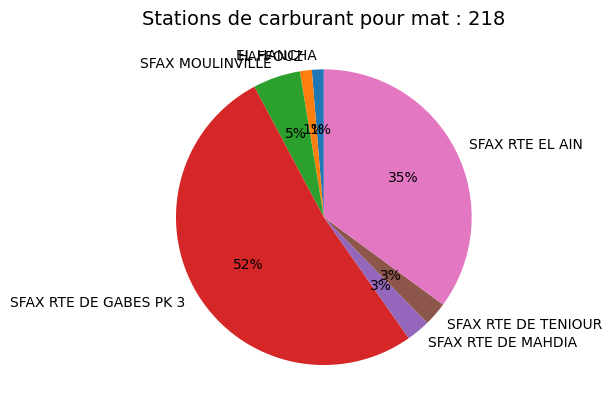

In [491]:
explode = (0.2, 0, 0, 0)  # on isole seulement la 4eme part

test.groupby('station').size().plot(kind='pie', autopct='%1.0f%%', startangle=90)
plt.title('Stations de carburant pour mat : 218', fontsize=14)

plt.show()

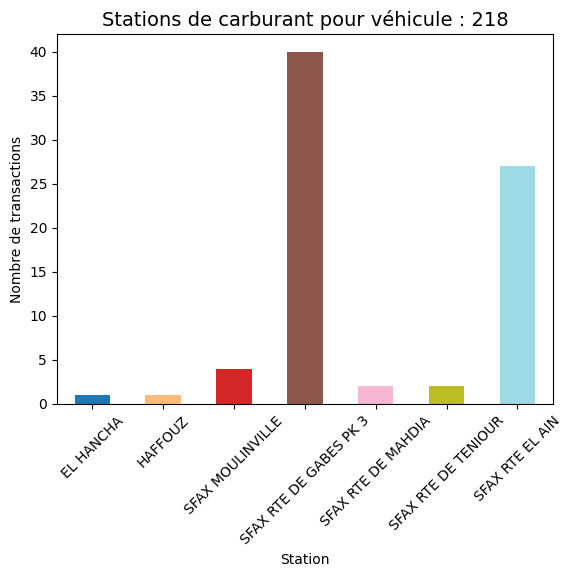

In [487]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'test' is your DataFrame and it has a 'station' column
# Example DataFrame creation (if needed):
# data = {'station': ['A', 'B', 'C', 'D', 'A', 'B', 'A', 'D', 'C', 'C']}
# test = pd.DataFrame(data)

# Group by 'station' and count the occurrences
station_counts = test.groupby('station').size()

# Generate colors for each bar
colors = plt.cm.tab20(np.linspace(0, 1, len(station_counts)))

# Plotting the bar chart
ax = station_counts.plot(kind='bar', color=colors)

# Adding title and labels
plt.title('Stations de carburant pour véhicule : 218', fontsize=14)
plt.xlabel('Station')
plt.ylabel('Nombre de transactions')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Display the plot
plt.show()


#### Pour une bonne détection d'anomalies  si elle existe, nous avons décidé de regrouper les stations de service par gouvernorat.

#### Premier essaie : Nominatim de geopy : Récupérer le gouvernorat d'une station donnée

In [443]:
import requests
import pandas as pd

def get_coordinates_nominatim(address):
    base_url = "https://nominatim.openstreetmap.org/search"
    params = {
        "q": address,
        "format": "json",
        "limit": 1,  # Limite les résultats à un seul pour simplifier le traitement
        "countrycodes": "TN"
    }
    headers = {
        "User-Agent": "YourAppName/1.0 (maissa.abdelwahed@gmail.com)"
    }
    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        data = response.json()
        print(data)
        if data:
            location = data[0]
            return location["lat"], location["lon"]
        else:
            print("No results found for address:", address)
            return None, None
    else:
        print("Error:", response)
        return None, None


/Users/abdelwahed/projet-maissa/projet-pfe-detecteur-fraude-carburant/myenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning:

urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020



In [444]:
address = "ZI 4"  # Assurez-vous d'avoir une colonne "adresse" dans votre fichier
lat, lng = get_coordinates_nominatim(address)
print(lat,lng)

Error: <Response [403]>
None None


#### <font color= 'red'> ==> Le résultat n'est pas toujours disponible, donc nous avon pensé au web scraping.</font>

#### Le traitement de regroupement des stations par gouvernorat est fait dans un fichier à part pour ne pas charger le notebook.
#### Dans ce qui suit, nous allons importer le nouveau fichier de données après le traitement réalisé pour continuer le reste du precessus de prétraitement.

In [88]:
gp2_carburant.to_csv('data/output-data/gp2_carburant_transformed_diff_date.csv', index=False)

### <font color = "brown"> II - Encodage des variables catégorielles </font>

#### Nous allons importer le fichier qui contient les gouvernorats obtenu à partir du web scrapping, et puis nous allons les encoder pour l'entrainement des modèles dans la partie Implémentation

In [433]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

gp2_carburant = pd.read_csv('data/output-data/gp2_carburant_transformed_diff_date_2.csv',delimiter =",")
gp2_carburant.head()

,matricule,date,quantite,fournisseur,typePaiement,type_carburant,station,diff_date,gouvernorat,lat,lon,zone
0,129,2022-08-23,29.61,SHELL,carte N° 1407043939,Gazoil,SFAX PICVILLE,1.0,Sfax,34.733475,10.750781,Sfax
1,129,2022-10-14,43.01,SHELL,carte N° 1407043939,Gazoil,SFAX RTE DE GABES PK 3,52.0,Sfax,34.761656,10.791997,Sfax
2,129,2022-10-15,21.51,SHELL,carte N° 1407043939,Gazoil,GP9,1.0,Tunis,36.867731,10.305333,Marsa
3,129,2022-12-05,25.19,SHELL,carte N° 1407043939,Gazoil,SFAX RTE DE GABES PK 3,51.0,Sfax,34.761656,10.791997,Sfax
4,129,2022-12-16,25.19,SHELL,carte N° 1407043939,Gazoil,SFAX RTE DE GABES PK 3,11.0,Sfax,34.761656,10.791997,Sfax


In [162]:
from sklearn.feature_extraction import FeatureHasher
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

def encoding_cat_feature (gp2_carburant) :

    le_carburant = LabelEncoder()
    le_gouvernorat = LabelEncoder()

    gp2_carburant['type_carburant_enc'] = le_carburant.fit_transform(gp2_carburant['type_carburant'])
    gp2_carburant['gouvernorat_enc'] = le_gouvernorat.fit_transform(gp2_carburant['gouvernorat'])

    return gp2_carburant

In [436]:
matricules = gp2_carburant['matricule'].unique()


In [164]:
encoded_dfs = []
for mat in matricules :
  datamat = gp2_carburant[gp2_carburant['matricule'] == mat]
  encodedmat = encoding_cat_feature(datamat)
  encoded_dfs.append(encodedmat)

# Concaténation des DataFrames encodés
encoded_dataset = pd.concat(encoded_dfs, axis=0)


<ipython-input-162-02332da30e72>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gp2_carburant['type_carburant_enc'] = le_carburant.fit_transform(gp2_carburant['type_carburant'])
<ipython-input-162-02332da30e72>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gp2_carburant['gouvernorat_enc'] = le_gouvernorat.fit_transform(gp2_carburant['gouvernorat'])
<ipython-input-162-02332da30e72>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [167]:
gp2_carburant = encoded_dataset
gp2_carburant

,matricule,date,quantite,fournisseur,typePaiement,type_carburant,station,diff_date,gouvernorat,lat,lon,zone,type_carburant_enc,gouvernorat_enc
0,129,2022-08-23,29.61,SHELL,carte N° 1407043939,Gazoil,SFAX PICVILLE,1.0,Sfax,34.733475,10.750781,Sfax,0,3
1,129,2022-10-14,43.01,SHELL,carte N° 1407043939,Gazoil,SFAX RTE DE GABES PK 3,52.0,Sfax,34.761656,10.791997,Sfax,0,3
2,129,2022-10-15,21.51,SHELL,carte N° 1407043939,Gazoil,GP9,1.0,Tunis,36.867731,10.305333,Marsa,0,5
3,129,2022-12-05,25.19,SHELL,carte N° 1407043939,Gazoil,SFAX RTE DE GABES PK 3,51.0,Sfax,34.761656,10.791997,Sfax,0,3
4,129,2022-12-16,25.19,SHELL,carte N° 1407043939,Gazoil,SFAX RTE DE GABES PK 3,11.0,Sfax,34.761656,10.791997,Sfax,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7929,837710,2024-02-21,0.35,SHELL,carte N° 1407058655,Gazoil 50,Z4 I,4.0,Tunis,36.777597,10.208947,Tunis,1,9
7930,837710,2024-02-26,34.01,SHELL,carte N° 1407058655,Gazoil 50,DAR CHAABANE,5.0,Nabeul,36.460861,10.760694,Dar Chaabane,1,7
7931,837710,2024-02-29,29.48,SHELL,carte N° 1407058655,Gazoil 50,Z4 I,3.0,Tunis,36.777597,10.208947,Tunis,1,9
7932,837710,2024-03-05,31.75,SHELL,carte N° 1407058655,Gazoil 50,SOLIMAN I,5.0,Nabeul,36.694794,10.486525,SOLIMAN,1,7


In [168]:
#gp2_carburant.head()
x = gp2_carburant[gp2_carburant['matricule'] == 230]
x['gouvernorat_enc'].unique()

array([8, 6, 2, 1, 0, 3, 7, 5, 4, 9])

In [169]:
gp2_carburant['gouvernorat'].unique()

array(['Sfax', 'Tunis', 'Nabeul', 'Ben Arous', 'Sousse', 'Ariana',
       'Mahdia', 'Bizerte', 'Béja', 'Siliana', 'Le Kef', 'Jendouba',
       'Zaghouan', 'Sidi Bouzid', 'La Manouba', 'Monastir', 'Gabès',
       'Kasserine', 'Kairouan', 'Médenine', 'Gafsa', 'Tozeur',
       'Tataouine'], dtype=object)

In [170]:
gp2_carburant.to_csv('data/output-data/gp2_carburant_transformed_diff_date_3.csv', index=False)

# _______________ Apprentissage non supervisé pour la détection d'anomalies _____________

## ------------------------------------------ 1 : SOM : Self - Organized Maps ---------------------------------------------

In [437]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pylab import bone, pcolor, colorbar, plot, show
import pylab as pl

In [438]:
#pip install minisom

In [439]:
gp2_carburant = pd.read_csv("data/output-data/gp2_carburant_transformed_diff_date_3.csv",delimiter =',')

gp2_carburant['date'] = pd.to_datetime(gp2_carburant['date'])
gp2 =gp2_carburant[gp2_carburant['matricule'] == 230]
gp2_carburant.head()

,matricule,date,quantite,fournisseur,typePaiement,type_carburant,station,diff_date,gouvernorat,lat,lon,zone,type_carburant_enc,gouvernorat_enc
0,129,2022-08-23,29.61,SHELL,carte N° 1407043939,Gazoil,SFAX PICVILLE,1.0,Sfax,34.733475,10.750781,Sfax,0,3
1,129,2022-10-14,43.01,SHELL,carte N° 1407043939,Gazoil,SFAX RTE DE GABES PK 3,52.0,Sfax,34.761656,10.791997,Sfax,0,3
2,129,2022-10-15,21.51,SHELL,carte N° 1407043939,Gazoil,GP9,1.0,Tunis,36.867731,10.305333,Marsa,0,5
3,129,2022-12-05,25.19,SHELL,carte N° 1407043939,Gazoil,SFAX RTE DE GABES PK 3,51.0,Sfax,34.761656,10.791997,Sfax,0,3
4,129,2022-12-16,25.19,SHELL,carte N° 1407043939,Gazoil,SFAX RTE DE GABES PK 3,11.0,Sfax,34.761656,10.791997,Sfax,0,3


In [232]:
# Trier les données par matricule puis par date 
gp2 = gp2.sort_values(by=['matricule', 'date'])
gp2 = gp2[['diff_date',"quantite","gouvernorat_enc",'type_carburant_enc']]

gp2.head()

,diff_date,quantite,gouvernorat_enc,type_carburant_enc
207,2.0,52.51,8,0
208,1.0,57.28,6,0
209,5.0,42.96,2,0
210,2.0,64.44,6,0
211,2.0,42.96,6,0


### Feature Scaling

In [234]:
from sklearn.preprocessing import StandardScaler
import math

object= StandardScaler()

# standardization
gp2_scaled = object.fit_transform(gp2)
#print(scale)

### Training the SOM


In [235]:
map_size = 5 * math.sqrt(len(gp2_scaled))
map_height = map_width = math.ceil(math.sqrt(map_size))

In [236]:
print(f'(map_height, map_width) = ({map_height}, {map_width})')
print(f'Number of features: {gp2_scaled.shape[1]}')

(map_height, map_width) = (9, 9)
Number of features: 4


In [237]:
gp2_scaled.shape[1]

4

In [238]:
#pip install minisom

You should consider upgrading via the '/Users/abdelwahed/projet-maissa/projet-pfe-detecteur-fraude-carburant/myenv/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [239]:
from minisom import MiniSom
from sklearn.metrics import silhouette_score

som = MiniSom(x=map_width, y=map_height, input_len = gp2_scaled.shape[1], sigma = 1.5, learning_rate =0.5
             # ,neighborhood_function='gaussian'
              )

som.random_weights_init(gp2_scaled)

#verbose=True : demandez au modèle SOM d'afficher des informations supplémentaires pendant l'entraînement
som.train(data = gp2_scaled, num_iteration = 1500, verbose = True)

 [ 1500 / 1500 ] 100% - 0:00:00 left 
 quantization error: 0.2165525100191243


### Comprendre les résultats

Le nœud gagnant est celui qui est le plus proche de l’entité d’entrée Xi.

Nous pouvons obtenir ses coordonnées (x, y) sur la carte en utilisant la méthode winner().

In [245]:
som.winner(gp2_scaled[0])

(np.int64(7), np.int64(4))

La carte de distance est un tableau 2D (17x17) où chaque élément représente la distance moyenne entre un neurone et ses voisins.

In [246]:
print('-------------\nDistance Map\n------------')
print(f'Shape: {som.distance_map().shape}')
print(f'First Line: {som.distance_map().T[0]}')

-------------
Distance Map
------------
Shape: (9, 9)
First Line: [1.         0.59260488 0.17532792 0.13188139 0.16548927 0.13998999
 0.10290004 0.07973231 0.04012304]


#### Visualiser les resultats

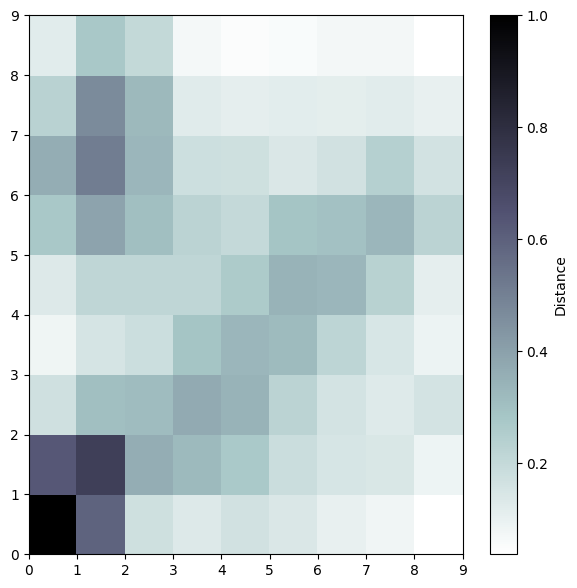

In [248]:
# Générer la U-Matrix
u_matrix = som.distance_map()

# Visualiser la U-Matrix
plt.figure(figsize=(7, 7))
plt.pcolor(u_matrix.T, cmap='bone_r')  # Transposée pour correspondre à l'orientation habituelle
plt.colorbar(label='Distance')
plt.show()

#### Interprétation

* Les nuances claires représentent les clusters tandis que les plus sombres représentent la séparation entre ces clusters.

* Les zones claires indiquent des groupes de neurones similaires.

* Les zones sombres peuvent révéler des séparations entre différents types de données.

## Identifier les anomalies

### Premier Seuil - ecart-type et moyenne des distances aux BMU

In [250]:
# Calculer la distance à BMU pour chaque donnée
distances_to_bmu = np.array([som.winner(d) for d in gp2_scaled])

# Calculer la norme de ces distances
norm_distances = np.linalg.norm(distances_to_bmu, axis=1)
print(type(norm_distances))

<class 'numpy.ndarray'>


In [251]:
# Définir un seuil
seuil = np.mean(norm_distances) + 1 * np.std(norm_distances)
print('seuil : ',seuil)

# Identifier les indices des anomalies
anomalies_indices = np.where(norm_distances > seuil)

#print(anomalies_indices)
gp21 =gp2_carburant[gp2_carburant['matricule'] == 230]

original_data_with_one_mat = gp21

#print("something to display : ",np.where(norm_distances > seuil)[0])
anomalies_df = original_data_with_one_mat.iloc[anomalies_indices]

seuil :  9.5184946894804


In [252]:
anomalies_df.head()

,matricule,date,quantite,fournisseur,typePaiement,type_carburant,station,diff_date,gouvernorat,lat,lon,zone,type_carburant_enc,gouvernorat_enc
285,230,2022-11-11,64.52,SHELL,carte N° 1407018303,Gazoil,SORTIE OUEST II,2.0,Tunis,36.774389,10.078156,Tunis,1,8
288,230,2022-11-26,60.96,SHELL,carte N° 1407018303,Gazoil,SORTIE OUEST II,3.0,Tunis,36.774389,10.078156,Tunis,1,8
289,230,2022-11-29,61.71,SHELL,carte N° 1407018303,Gazoil,KABARIA,3.0,Tunis,36.764492,10.114839,Kabaria,1,8
290,230,2022-12-01,60.45,SHELL,carte N° 1407018303,Gazoil,CITE SPORTIVE,2.0,Tunis,36.744486,10.264411,Cite Sportive,1,8
292,230,2022-12-06,52.90,SHELL,carte N° 1407018303,Gazoil,CITE SPORTIVE,1.0,Tunis,36.744486,10.264411,Cite Sportive,1,8


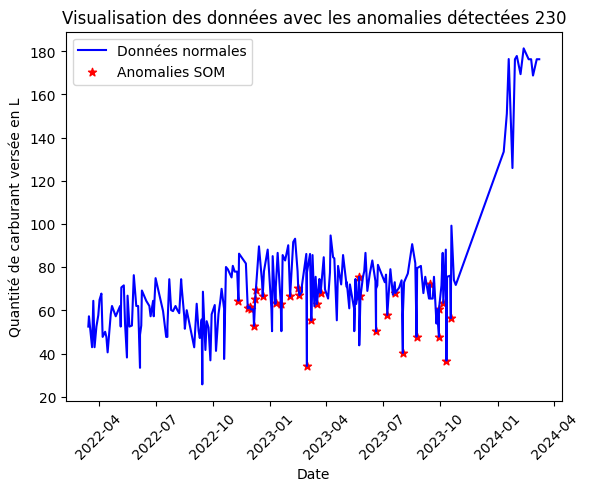

In [253]:
import matplotlib.pyplot as plt

df_mat_original = gp21
#[gp2_1['matricule'] == 388]

# Visualisation des données avec une distinction pour les anomalies
plt.plot(df_mat_original['date'], df_mat_original['quantite'], label='Données normales',color ='blue')
plt.scatter(anomalies_df['date'], anomalies_df['quantite'], color = 'r', label='Anomalies SOM',marker ='*')
plt.legend()
#rotate x-axis labels
for index, row in anomalies_df.iterrows():
     plt.annotate((""),(row['date'], row['quantite']), fontsize=10)

plt.xlabel('Date')
plt.ylabel('Quantité de carburant versée en L')
plt.title('Visualisation des données avec les anomalies détectées 230')
plt.legend()
plt.xticks(rotation=45)
plt.show()

### Deuxième Seuil - basé sur les quantiles des aux BMU

In [256]:
# Calculer le seuil en utilisant le quartile
quantile_threshold = np.quantile(norm_distances, 0.75)

# Identifier les indices des anomalies basées sur le seuil de quantile
indices_quartile = np.where(norm_distances > quantile_threshold)

# Récupérer les données correspondant aux indices des anomalies
anomalies_df_quartile = original_data_with_one_mat.iloc[indices_quartile]

#### Visualiser les résultats de 2eme seuil

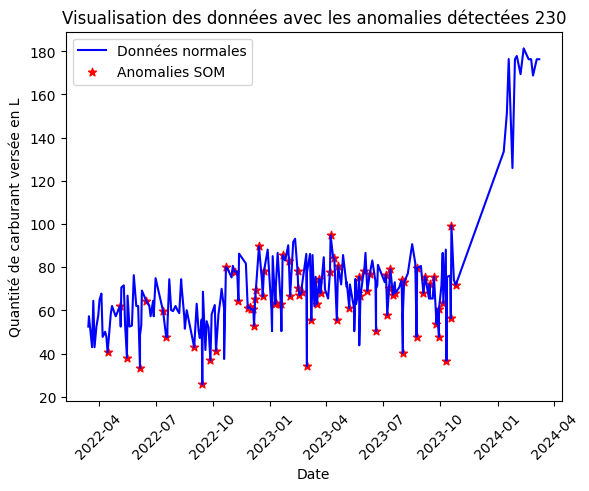

In [257]:
import matplotlib.pyplot as plt

df_mat_original = gp21
#[gp2_1['matricule'] == 388]

# Visualisation des données avec une distinction pour les anomalies
plt.plot(df_mat_original['date'], df_mat_original['quantite'], label='Données normales',color ='blue')
plt.scatter(anomalies_df_quartile['date'], anomalies_df_quartile['quantite'], color = 'r', label='Anomalies SOM',marker ='*')
plt.legend()
#rotate x-axis labels
for index, row in anomalies_df_quartile.iterrows():
     plt.annotate((""),(row['date'], row['quantite']), fontsize=10)

plt.xlabel('Date')
plt.ylabel('Quantité de carburant versée en L')
plt.title('Visualisation des données avec les anomalies détectées 230')
plt.legend()
plt.xticks(rotation=45)
plt.show()

### <font color = "blue">Évaluation</font>


#### **1 - La métrqiue Silouhette**

In [242]:
#Extrayez les étiquettes des clusters à partir des coordonnées des unités gagnantes
cluster_labels = np.array([som.winner(x) for x in gp2_scaled])
#print(cluster_labels)
# Appliquez une transformation pour obtenir un tableau unidimensionnel
labels_1d = cluster_labels[:, 0] * som._weights.shape[1] + cluster_labels[:, 1]
#print(labels_1d)

#labels = np.array([som.winner(x) for x in gp2_scaled])

# Calcul du coefficient de silhouette
silhouette_avg = silhouette_score(gp2_scaled, labels_1d)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.3305884391479406


#### 2 - **Evaluation sur un ensemble de test**

In [259]:
transactions_som = pd.DataFrame({
    #'matricule': [230, 230, 230,230,230],
    'quantite': [52.09, 56.65, 56.65,67.00,68.09,444,50.0,75.0,30,43.00,76.0,80.33,82.98,100.00,98.08,25.09,30,49.00,70.9,75.00],
    'type_carburant_enc': [0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0],
    'diff_date': [2.0,2.0,2.0,4.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,4.0,2.0,3.0],
    'gouvernorat_enc': [15,3,3,5,9,9,9,5,5,5,4,4,4,4,9,9,3,3,3,4],
   })

transactions_som.head()


,quantite,type_carburant_enc,diff_date,gouvernorat_enc
0,52.09,0,2.0,15
1,56.65,2,2.0,3
2,56.65,0,2.0,3
3,67.00,0,4.0,5
4,68.09,0,1.0,9


In [260]:
# standardization
val_data_scaled = object.fit_transform(transactions_som)
#print(scale)

In [261]:
# Calculer les distances à BMU pour chaque donnée de validation
distances_to_bmu_validation = np.array([som.winner(d) for d in val_data_scaled])

# Calculer la norme de ces distances pour les nouvelles données de validation
norm_distances_validation = np.linalg.norm(distances_to_bmu_validation, axis=1)


In [262]:
# Calculer le seuil en utilisant le quartile
quantile_threshold_val = np.quantile(norm_distances_validation, 0.75)

# Identifier les indices des anomalies basées sur le seuil de quantile
indices_quartile_val = np.where(norm_distances_validation > quantile_threshold_val)

# Récupérer les données correspondant aux indices des anomalies
anomalies_df_quartile_val = original_data_with_one_mat.iloc[indices_quartile_val]

In [263]:

# Créer une colonne 'anomaly_label' initialisée à 1 (normale)
transactions_som['anomaly_label'] = 1

# Marquer les anomalies détectées par -1
transactions_som.loc[indices_quartile_val[0], 'anomaly_label'] = -1

Matrice de confusion

In [264]:
transactions_som['real_labels'] = [-1,-1,1,-1,1,-1,1,-1,-1,
                              1,
                               -1,1,1,-1,-1,-1,-1,1,-1,1]

In [265]:
#transactions_som.drop(["4"],axis=1)

In [266]:
transactions_som.columns

Index(['quantite', 'type_carburant_enc', 'diff_date', 'gouvernorat_enc',
       'anomaly_label', 'real_labels'],
      dtype='object')

In [267]:
transactions_som

,quantite,type_carburant_enc,diff_date,gouvernorat_enc,anomaly_label,real_labels
0,52.09,0,2.0,15,1,-1
1,56.65,2,2.0,3,1,-1
2,56.65,0,2.0,3,1,1
3,67.00,0,4.0,5,-1,-1
4,68.09,0,1.0,9,1,1
5,444.00,0,2.0,9,1,-1
6,50.00,0,1.0,9,1,1
7,75.00,0,2.0,5,1,-1
8,30.00,0,1.0,5,1,-1
9,43.00,0,2.0,5,1,1


Matrice de confusion :


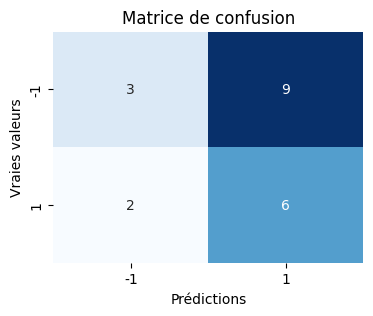

              precision    recall  f1-score   support

          -1       0.60      0.25      0.35        12
           1       0.40      0.75      0.52         8

    accuracy                           0.45        20
   macro avg       0.50      0.50      0.44        20
weighted avg       0.52      0.45      0.42        20



In [268]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

#  y_true et y_pred
y_true = transactions_som['real_labels']
y_pred = transactions_som['anomaly_label']

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_true, y_pred)

# Afficher la matrice de confusion
print("Matrice de confusion :")
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['-1', '1'], yticklabels=['-1', '1'])
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de confusion')
plt.show()

# Calculer le rapport de classification
classif_report = classification_report(y_true, y_pred)

# Afficher le rapport de classification
#print("\nRapport de classification :")
print(classif_report)

## --------------------------------------- 2 : AutoEncoders ------------------------------------------

In [270]:
import pandas as pd

gp2_carburant = pd.read_csv("data/output-data/gp2_carburant_transformed_diff_date_3.csv",delimiter =',')


gp2_carburant['date'] = pd.to_datetime(gp2_carburant['date'],format = '%Y-%m-%d')
# traitement de df  : le dataframe complet
#df2.set_index('date',inplace=True)
df1 = gp2_carburant[gp2_carburant['matricule'] == 230]
df2 = df1[['quantite','type_carburant_enc','diff_date','gouvernorat_enc']]
#df2 = df2[['quantite']]
df2.head()

,quantite,type_carburant_enc,diff_date,gouvernorat_enc
207,52.51,0,2.0,8
208,57.28,0,1.0,6
209,42.96,0,5.0,2
210,64.44,0,2.0,6
211,42.96,0,2.0,6


In [274]:
pip install tensorflow

You should consider upgrading via the '/Users/abdelwahed/projet-maissa/projet-pfe-detecteur-fraude-carburant/myenv/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
#import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
#from tensorflow.keras.backend import run_eagerly

def LSTMAE1(input_dim,loss= "MSE") :

    model1 = Sequential()

    #encoder
    model1.add(Dense(input_dim, activation ='relu',input_shape =(input_dim,)))
    model1.add(Dense(218,activation='relu'))
    #model1.add(Dropout(rate=0.2))
    model1.add(Dense(32,activation='relu'))

    #bottleneck
    model1.add(Dense(units=16,activation='relu'))
    #model1.add(BatchNormalization())

    #doceder
    model1.add(Dense(32,activation = 'relu'))
    model1.add(Dropout(rate = 0.2))
    model1.add(Dense(218,activation = 'relu'))
    model1.add(Dense(input_dim, activation ='sigmoid'))

    #model.add(TimeDistributed(Dense(nbr_entries)))

    optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate = 0.01)
    model1.compile(optimizer = optimizer,loss = loss,run_eagerly =True)

    return model1


In [390]:
from sklearn.preprocessing import MinMaxScaler

#Normaiser les données
scaler1 = MinMaxScaler()
donnes_1 = df2.values
#print(donnes.shape())
#print(len(donnes))
normalized_data_1 = scaler1.fit_transform(donnes_1)
#print(normalized_data)


In [391]:
model1 = LSTMAE1(normalized_data_1.shape[1])

In [392]:
import time

start = time.time()

In [393]:
history1 = model1.fit(normalized_data_1,normalized_data_1, epochs = 50, batch_size = 16,verbose = 1,shuffle=True)
print(f"model trained in {(time.time()-start) / 60} minutes")
print(history1)


Epoch 1/50
14/14 [==============================] - 0s 26ms/step - loss: 0.0936
Epoch 2/50
14/14 [==============================] - 0s 26ms/step - loss: 0.0491
Epoch 3/50
14/14 [==============================] - 0s 29ms/step - loss: 0.0293
Epoch 4/50
14/14 [==============================] - 0s 26ms/step - loss: 0.0299
Epoch 5/50
14/14 [==============================] - 0s 26ms/step - loss: 0.0204
Epoch 6/50
14/14 [==============================] - 0s 29ms/step - loss: 0.0145
Epoch 7/50
14/14 [==============================] - 0s 25ms/step - loss: 0.0108
Epoch 8/50
14/14 [==============================] - 0s 27ms/step - loss: 0.0088
Epoch 9/50
14/14 [==============================] - 0s 27ms/step - loss: 0.0085
Epoch 10/50
14/14 [==============================] - 0s 25ms/step - loss: 0.0079
Epoch 11/50
14/14 [==============================] - 0s 30ms/step - loss: 0.0069
Epoch 12/50
14/14 [==============================] - 0s 26ms/step - loss: 0.0050
Epoch 13/50
14/14 [==================

### Détection d'anomalies

**Seuil 1 - Statistiques moyenne et écart-type de l'erreur de reconstructions**




In [394]:
#Normaiser les données
scaler = MinMaxScaler()
donnes_2 = df2.values

normalized_data_2 = scaler.fit_transform(donnes_2.reshape(-1,1))

In [395]:
predicted_1 = model1.predict(normalized_data_1)

7/7 [==============================] - 0s 10ms/step


In [396]:
import numpy as np
reconstruction_error1 = np.mean((normalized_data_1 - predicted_1) ** 2, axis = 1)
len(reconstruction_error1)

218

In [397]:
decision1 = - reconstruction_error1 + np.mean(reconstruction_error1) + 1 * np.std(reconstruction_error1)


In [ ]:
#df1 = df2

In [399]:
final_df_1 = df1
print(df1)
final_df_1['predict'] = list(decision1)
final_df_1['predict'].sample(5)


     matricule       date  quantite fournisseur         typePaiement  \
207        230 2022-03-15     52.51       SHELL  carte N° 1407018303   
208        230 2022-03-16     57.28       SHELL  carte N° 1407018303   
209        230 2022-03-21     42.96       SHELL  carte N° 1407018303   
210        230 2022-03-23     64.44       SHELL  carte N° 1407018303   
211        230 2022-03-25     42.96       SHELL  carte N° 1407018303   
..         ...        ...       ...         ...                  ...   
420        230 2024-02-20    176.32       SHELL  carte N° 1407018303   
421        230 2024-02-24    176.32       SHELL  carte N° 1407018303   
422        230 2024-02-27    168.77       SHELL  carte N° 1407018303   
423        230 2024-03-04    176.32       SHELL  carte N° 1407018303   
424        230 2024-03-08    176.32       SHELL  carte N° 1407018303   

    type_carburant        station  diff_date gouvernorat        lat  \
207        Essence            GP9        2.0       Tunis  36.867

<ipython-input-399-83cd35d0f156>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_1['predict'] = list(decision1)


222    0.017565
286    0.017992
359    0.017993
211    0.015928
256    0.015944
Name: predict, dtype: float64

In [400]:
final_df_1['predict'] = final_df_1['predict'].apply(lambda x : -1 if x < 0 else 1)

<ipython-input-400-34faf1c4ca8b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_1['predict'] = final_df_1['predict'].apply(lambda x : -1 if x < 0 else 1)


In [401]:
final_df_1['predict']

207    1
208    1
209    1
210    1
211    1
      ..
420    1
421    1
422    1
423    1
424    1
Name: predict, Length: 218, dtype: int64

(array([150., 200., 250., 300., 350., 400., 450.]),
 [Text(150.0, 0, '150'),
  Text(200.0, 0, '200'),
  Text(250.0, 0, '250'),
  Text(300.0, 0, '300'),
  Text(350.0, 0, '350'),
  Text(400.0, 0, '400'),
  Text(450.0, 0, '450')])

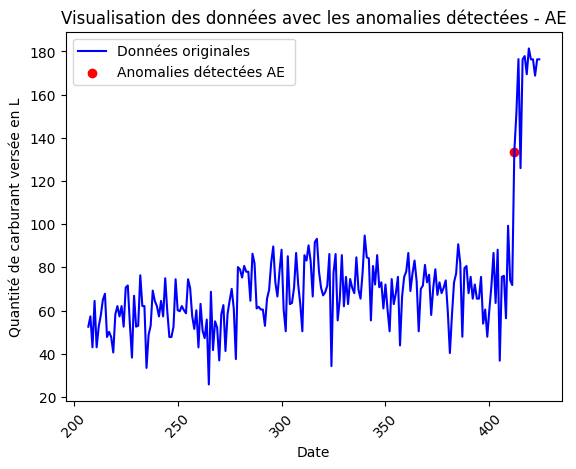

In [402]:
#plt.plot(final_df_1[['quantite','predict']])
#plt.xticks(rotation = 45)
import matplotlib.pyplot as plt

anomalies = final_df_1[final_df_1['predict'] == -1]
plt.plot(final_df_1['quantite'],label='Données originales', color='blue')
plt.scatter(anomalies.index,anomalies['quantite'],color='red', label='Anomalies détectées AE ', marker='o')

plt.xlabel('Date')
plt.ylabel('Quantité de carburant versée en L')
plt.title('Visualisation des données avec les anomalies détectées - AE')
plt.legend()
plt.xticks(rotation=45)

**Seuil 2 - Basé sur un certain quantile (75)**

In [403]:
quantile_threshold_ae = np.quantile(reconstruction_error1, 0.75)
anomalies_indices_ae = np.where(reconstruction_error1 > quantile_threshold_ae)
anomalies_df_ae = df1.iloc[anomalies_indices_ae]

(array([150., 200., 250., 300., 350., 400., 450.]),
 [Text(150.0, 0, '150'),
  Text(200.0, 0, '200'),
  Text(250.0, 0, '250'),
  Text(300.0, 0, '300'),
  Text(350.0, 0, '350'),
  Text(400.0, 0, '400'),
  Text(450.0, 0, '450')])

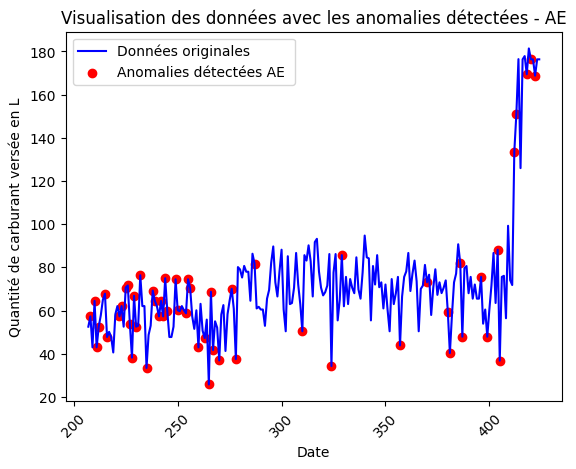

In [404]:
#plt.plot(final_df_1[['quantite','predict']])
#plt.xticks(rotation = 45)
import matplotlib.pyplot as plt

anomalies = final_df_1[final_df_1['predict'] == -1]
plt.plot(final_df_1['quantite'],label='Données originales', color='blue')
plt.scatter(anomalies_df_ae.index,anomalies_df_ae['quantite'],color='red', label='Anomalies détectées AE ', marker='o')

plt.xlabel('Date')
plt.ylabel('Quantité de carburant versée en L')
plt.title('Visualisation des données avec les anomalies détectées - AE')
plt.legend()
plt.xticks(rotation=45)

### Evaluation sur un ensemble de test

In [408]:
transactions_ae = pd.DataFrame({
    #'matricule': [230, 230, 230,230,230],
    'quantite': [52.09, 56.65, 56.65,67.00,68.09,444,50.0,75.0,30,43.00,76.0,80.33,82.98,100.00,98.08,25.09,30,49.00,70.9,75.00],
    'type_carburant_enc': [0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0],
    'diff_date': [2.0,2.0,2.0,4.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,4.0,2.0,3.0],
    'gouvernorat_enc': [15,3,3,5,9,9,9,5,5,5,4,4,4,4,9,9,3,3,3,4],
   })

transactions_ae.head()

,quantite,type_carburant_enc,diff_date,gouvernorat_enc
0,52.09,0,2.0,15
1,56.65,2,2.0,3
2,56.65,0,2.0,3
3,67.00,0,4.0,5
4,68.09,0,1.0,9


In [409]:
normalized_new_data = scaler1.fit_transform(transactions_ae.values)

In [410]:
# Faire des prédictions avec le modèle Autoencoder
predicted_new_data = model1.predict(normalized_new_data)

# Calculer l'erreur de reconstruction pour chaque nouvelle observation
reconstruction_error_new = np.mean((normalized_new_data - predicted_new_data) ** 2, axis=1)

# Calculer le 75ème quantile de l'erreur de reconstruction
quantile_threshold_ae = np.quantile(reconstruction_error_new, 0.75)

# Comparer l'erreur de reconstruction avec le seuil
anomalies_new_indices = np.where(reconstruction_error_new > quantile_threshold_ae)

# Récupérer les nouvelles données correspondant aux anomalies
anomalies_new_df = transactions_ae.iloc[anomalies_new_indices]

# Ajouter une colonne pour annoter les anomalies dans le DataFrame des nouvelles données
transactions_ae['anomaly_label'] = 1
transactions_ae.loc[anomalies_new_indices[0], 'anomaly_label'] = -1

# Afficher les anomalies détectées



1/1 [==============================] - 0s 42ms/step


In [411]:
transactions_ae['real_labels'] = [-1,-1,1,-1,1,-1,1,-1,-1,
                              1,
                               -1,1,1,-1,-1,-1,-1,1,-1,1]

In [412]:
transactions_ae

,quantite,type_carburant_enc,diff_date,gouvernorat_enc,anomaly_label,real_labels
0,52.09,0,2.0,15,1,-1
1,56.65,2,2.0,3,-1,-1
2,56.65,0,2.0,3,1,1
3,67.00,0,4.0,5,-1,-1
4,68.09,0,1.0,9,1,1
5,444.00,0,2.0,9,-1,-1
6,50.00,0,1.0,9,1,1
7,75.00,0,2.0,5,1,-1
8,30.00,0,1.0,5,1,-1
9,43.00,0,2.0,5,1,1


Matrice de confusion :


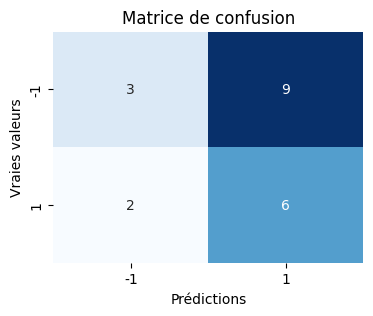

              precision    recall  f1-score   support

          -1       0.60      0.25      0.35        12
           1       0.40      0.75      0.52         8

    accuracy                           0.45        20
   macro avg       0.50      0.50      0.44        20
weighted avg       0.52      0.45      0.42        20



In [413]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

#  y_true et y_pred
y_true = transactions_ae['real_labels']
y_pred = transactions_ae['anomaly_label']

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_true, y_pred)

# Afficher la matrice de confusion
print("Matrice de confusion :")
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['-1', '1'], yticklabels=['-1', '1'])
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de confusion')
plt.show()

# Calculer le rapport de classification
classif_report = classification_report(y_true, y_pred)

# Afficher le rapport de classification
#print("\nRapport de classification :")
print(classif_report)

## <font color ='red'>----------------------------------------------- 3 : Isolation Forest ---------------------------------------</font>

In [66]:
#%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import plotly.express as px
#from mplcursors import cursor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [281]:
dataframe = pd.read_csv("data/output-data/gp2_carburant_transformed_diff_date_3.csv",delimiter=',')
dataframe['date'] = pd.to_datetime(dataframe['date'], format='%Y-%m-%d')
dataframe
dataframe.head()
#dataframe['date'] = dataframe['date'].sort_values()

,matricule,date,quantite,fournisseur,typePaiement,type_carburant,station,diff_date,gouvernorat,lat,lon,zone,type_carburant_enc,gouvernorat_enc
0,129,2022-08-23,29.61,SHELL,carte N° 1407043939,Gazoil,SFAX PICVILLE,1.0,Sfax,34.733475,10.750781,Sfax,0,3
1,129,2022-10-14,43.01,SHELL,carte N° 1407043939,Gazoil,SFAX RTE DE GABES PK 3,52.0,Sfax,34.761656,10.791997,Sfax,0,3
2,129,2022-10-15,21.51,SHELL,carte N° 1407043939,Gazoil,GP9,1.0,Tunis,36.867731,10.305333,Marsa,0,5
3,129,2022-12-05,25.19,SHELL,carte N° 1407043939,Gazoil,SFAX RTE DE GABES PK 3,51.0,Sfax,34.761656,10.791997,Sfax,0,3
4,129,2022-12-16,25.19,SHELL,carte N° 1407043939,Gazoil,SFAX RTE DE GABES PK 3,11.0,Sfax,34.761656,10.791997,Sfax,0,3


In [298]:
from sklearn.ensemble import IsolationForest

import pickle
import joblib

#scaler = StandardScaler()
minmaxscaler = MinMaxScaler()
standardscaler = StandardScaler()

def train_isolation_forest_model(mat_dataset):

    string_model = "models/"+str(mat_dataset['matricule'].unique())+ ".pkl"

    data = mat_dataset[['quantite','type_carburant_enc','diff_date','gouvernorat_enc']]

    # Isolation forest model
    outliers_fraction = 0.3
    random_state = np.random.RandomState(42)

    ifo_model = IsolationForest(n_estimators=20, contamination='auto',max_features = 4)

    ifo_model.fit(data)
    mat_dataset['anomaly_if'] = ifo_model.predict(data)
    mat_dataset['anomaly_score'] = ifo_model.decision_function(data)
    joblib.dump(ifo_model, string_model)

    return mat_dataset,ifo_model

In [440]:
#récuperer la liste des matricules
matricules = dataframe['matricule'].unique()

In [300]:
if_final = pd.DataFrame()
print(if_final)

#mlflow.set_experiment(experiment_id="0")
m = 0
for mat in matricules :

    data_per_mat = dataframe[dataframe['matricule'] == mat]

    if_dataset,m = train_isolation_forest_model(data_per_mat)
    if_final = pd.concat([if_final, if_dataset], ignore_index = True)

Empty DataFrame
Columns: []
Index: []


/var/folders/rr/2krd8f3127vdzr1f5q53tyzc0000gn/T/ipykernel_8810/1155858592.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/rr/2krd8f3127vdzr1f5q53tyzc0000gn/T/ipykernel_8810/1155858592.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/rr/2krd8f3127vdzr1f5q53tyzc0000gn/T/ipykernel_8810/1155858592.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [351]:
#enregistrer le dataset
if_final.to_csv('data/output-data/if_dataset.csv', index=False)

In [286]:
#transactions

In [301]:
my_saved_model = joblib.load('models/[230].pkl')

transactions = pd.DataFrame({
    #'matricule': [230, 230, 230,230,230],
    'quantite': [52.09, 56.65, 56.65,67.00,68.09,444,50.0,75.0,30,43.00,76.0,80.33,82.98,100.00,98.08,25.09,30,49.00,70.9,75.00],
    'type_carburant_enc': [0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0],
    'diff_date': [2.0,2.0,2.0,4.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,4.0,2.0,3.0],
    'gouvernorat_enc': [15,3,3,5,9,9,9,5,5,5,4,4,4,4,9,9,3,3,3,4],
   })


transactions

,quantite,type_carburant_enc,diff_date,gouvernorat_enc
0,52.09,0,2.0,15
1,56.65,2,2.0,3
2,56.65,0,2.0,3
3,67.00,0,4.0,5
4,68.09,0,1.0,9
5,444.00,0,2.0,9
6,50.00,0,1.0,9
7,75.00,0,2.0,5
8,30.00,0,1.0,5
9,43.00,0,2.0,5


In [302]:
#np_scaled = pd.DataFrame(np_scaled)
transactions['anomaly_if'] = my_saved_model.predict(transactions)
transactions

,quantite,type_carburant_enc,diff_date,gouvernorat_enc,anomaly_if
0,52.09,0,2.0,15,1
1,56.65,2,2.0,3,1
2,56.65,0,2.0,3,-1
3,67.00,0,4.0,5,-1
4,68.09,0,1.0,9,1
5,444.00,0,2.0,9,-1
6,50.00,0,1.0,9,1
7,75.00,0,2.0,5,-1
8,30.00,0,1.0,5,-1
9,43.00,0,2.0,5,1


In [311]:
transactions['real_labels'] = [-1,-1,1,-1,1,-1,1,-1,-1,
                              1,
                               -1,1,1,-1,-1,-1,-1,1,-1,1]
transactions

,quantite,type_carburant_enc,diff_date,gouvernorat_enc,anomaly_if,real_labels
0,52.09,0,2.0,15,1,-1
1,56.65,2,2.0,3,1,-1
2,56.65,0,2.0,3,-1,1
3,67.00,0,4.0,5,-1,-1
4,68.09,0,1.0,9,1,1
5,444.00,0,2.0,9,-1,-1
6,50.00,0,1.0,9,1,1
7,75.00,0,2.0,5,-1,-1
8,30.00,0,1.0,5,-1,-1
9,43.00,0,2.0,5,1,1


### <font color= "green"> Evaluation des performances de Isolation Forest </font>

Matrice de confusion :


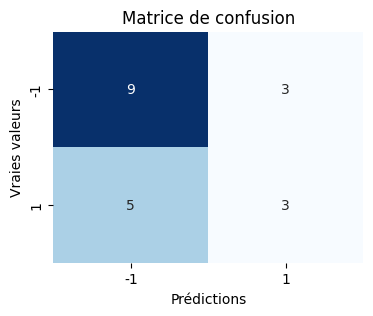

              precision    recall  f1-score   support

          -1       0.64      0.75      0.69        12
           1       0.50      0.38      0.43         8

    accuracy                           0.60        20
   macro avg       0.57      0.56      0.56        20
weighted avg       0.59      0.60      0.59        20



In [312]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

#  y_true et y_pred
y_true = transactions['real_labels']
y_pred = transactions['anomaly_if']

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_true, y_pred)

# Afficher la matrice de confusion
print("Matrice de confusion :")
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['-1', '1'], yticklabels=['-1', '1'])
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de confusion')
plt.show()

# Calculer le rapport de classification
classif_report = classification_report(y_true, y_pred)

# Afficher le rapport de classification
#print("\nRapport de classification :")
print(classif_report)

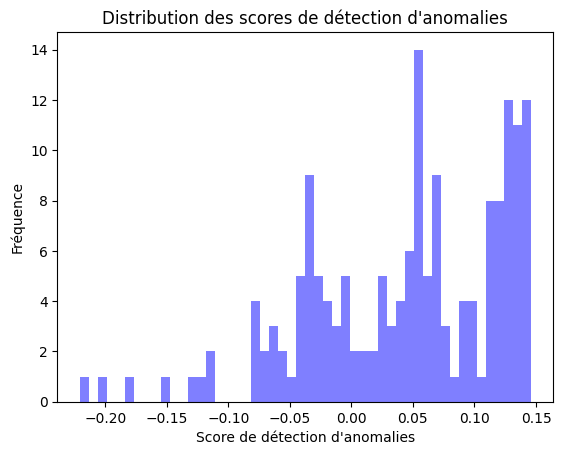

In [309]:
import matplotlib.pyplot as plt

# Tracer un histogramme des scores de détection d'anomalies

plt.hist(data_per_mat['anomaly_score'], bins=50, color='blue', alpha=0.5)
plt.xlabel('Score de détection d\'anomalies')
plt.ylabel('Fréquence')
plt.title('Distribution des scores de détection d\'anomalies')
plt.show()

In [310]:
import numpy as np

# Calcul de la stabilité en utilisant les prédictions de l'Isolation Forest
def compute_stability(predictions, num_runs=10):
    n_samples = len(predictions)
    stability_scores = []
    for _ in range(num_runs):
        random_predictions = np.random.choice(predictions, n_samples, replace=False)
        stability_score = np.mean(predictions == random_predictions)
        stability_scores.append(stability_score)
    return np.mean(stability_scores)

# Supposons que anomaly_predictions sont les prédictions de votre modèle Isolation Forest

stability_score = compute_stability(res_1['anomaly_if'])
print("Stability Score:", stability_score)


Stability Score: 0.6403669724770642


### <font color ='green'>Afficher un exemple de données pour une matricule spécifique </font>

In [305]:
res = if_final[(if_final['matricule'] == 230) & (if_final['anomaly_if'] == -1)]
res_1 = if_final[(if_final['matricule'] == 230) ]
print(len(res_1))

res.head()

218


,matricule,date,quantite,fournisseur,typePaiement,type_carburant,station,diff_date,gouvernorat,lat,lon,zone,type_carburant_enc,gouvernorat_enc,anomaly_if,anomaly_score
209,230,2022-03-21,42.96,SHELL,carte N° 1407018303,Essence,RAS JEBEL,5.0,Bizerte,37.220483,10.115547,Ras Jebel,0,2,-1,-0.083367
214,230,2022-04-02,64.92,SHELL,carte N° 1407018303,Essence,MGHIRA,2.0,Ben Arous,36.712250,10.180528,Mghira,0,1,-1,-0.056340
215,230,2022-04-05,67.78,SHELL,carte N° 1407018303,Essence,DAR CHAABANE,3.0,Nabeul,36.460861,10.760694,Dar Chaabane,0,6,-1,-0.003597
217,230,2022-04-11,50.12,SHELL,carte N° 1407018303,Essence,Z4 II,4.0,Ben Arous,36.775764,10.213661,Megrine,0,1,-1,-0.063636
222,230,2022-04-28,57.28,SHELL,carte N° 1407018303,Essence,KORBA 2,6.0,Nabeul,36.353550,10.522170,Korba,0,6,-1,-0.043508


### <font color = 'orange'> Visualisation Interactive de résultat d'une matricule</font>


In [306]:
import plotly.io as pio
pio.renderers.default = "notebook_connected"

In [308]:
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'iframe'

# Convertir les dates en chaine
#res_1['date'] = res_1['date'].astype(str)
anomalies = res_1[res_1['anomaly_if'] == -1]

# Ajouter la trace principale pour les données
fig = px.line(res_1, x='date', y='quantite',title='Visualisation des données avec les anomalies détectées',
              labels={'quantite': 'Quantité'},
              hover_data=['type_carburant','diff_date'])

# Ajouter une trace pour les anomalies
fig.add_trace(go.Scatter(x=anomalies['date'], y=anomalies['quantite'], mode='markers', name='Anomalies',
                         marker=dict(color='red', size=10),
                         hoverinfo='text', # Utiliser 'text' pour que seules les informations personnalisées soient affichées
                         hovertext=anomalies.apply(lambda row: f"Date : {row['date']}<br>Quantité : {row['quantite']}<br>Type_carburant : {row['type_carburant']}<br>Diff_period : {row['diff_date']} jours", axis=1)))

# Amélioration du formatage
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Quantité de carburant versée en L',
    legend_title='Légende',
    xaxis_tickangle=-25
)

# Affichage du graphique
fig.show()

### <font color ='green'>Résultat final obtenu grâce à Isolation Forest</font>

AttributeError: 'Wedge' object has no attribute 'get_height'

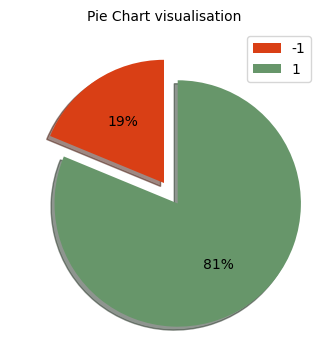

In [528]:
#pie chart plot
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)

explode = (0, 0.2)  # on isole seulement la 1ère part
#add colors
colors = ['#D93F15','#67966A']

bar_plot  = if_final.groupby('anomaly_if').size().plot(kind='pie', autopct='%1.0f%%',colors =colors, shadow=True, labels =None,legend =True,
                                           startangle=90, explode= explode,
#labels = ['Transactions \n anormales','Transactions \n Normales']
)
plt.title('Pie Chart visualisation', fontsize=10)
# Ajouter les étiquettes au-dessus des barres
for patch in bar_plot.patches:
    height = patch.get_height()
    bar_plot.text(patch.get_x() + patch.get_width() / 2, 
                  height + 0.5, 
                  str(height), 
                  ha='center', va='bottom')
# bar plot
plt.subplot(1,2,2)
bars = if_final.groupby('anomaly_if').size().plot(kind='bar',color =['#D9CA15','#030D8C'])
plt.title('Bar Plot visualisation', fontsize=10)

#afficher les figures
plt.suptitle('Proportion globale des anomalies',fontsize=14,fontweight ='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajuste les subplots dans la figure pour laisser de l'espace pour le suptitle

plt.show()

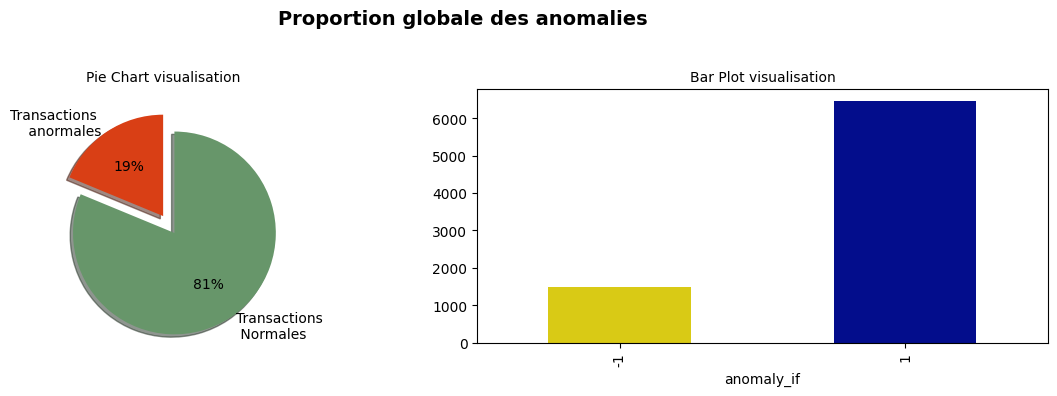

In [313]:
#pie chart plot
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)

explode = (0, 0.2)  # on isole seulement la 1ère part
#add colors
colors = ['#D93F15','#67966A']

if_final.groupby('anomaly_if').size().plot(kind='pie', autopct='%1.0f%%',colors =colors, shadow=True,
                                           startangle=90, explode= explode,labels = ['Transactions \n anormales','Transactions \n Normales'])
plt.title('Pie Chart visualisation', fontsize=10)

# bar plot
plt.subplot(1,2,2)
bars = if_final.groupby('anomaly_if').size().plot(kind='bar',color =['#D9CA15','#030D8C'])
plt.title('Bar Plot visualisation', fontsize=10)

#afficher les figures
plt.suptitle('Proportion globale des anomalies',fontsize=14,fontweight ='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajuste les subplots dans la figure pour laisser de l'espace pour le suptitle

plt.show()

## <font color ='blue'>-------------------------------------- Explication des résultats de Isolation Forest -------------------------------</font>

In [352]:
#récuperer les données d'une matricule spécifique

dataframe1 = pd.read_csv("data/output-data/if_dataset.csv")
sub_mat = dataframe1[dataframe1['matricule'] == 230]

my_saved_model = joblib.load("models/["+str(230)+"].pkl")

# Filtrer les données
sub_mat = sub_mat[['quantite','type_carburant_enc','diff_date','gouvernorat_enc']]

feature_names = sub_mat.columns

In [353]:
dataframe1.head()

,matricule,date,quantite,fournisseur,typePaiement,type_carburant,station,diff_date,gouvernorat,lat,lon,zone,type_carburant_enc,gouvernorat_enc,anomaly_if,anomaly_score
0,129,2022-08-23,29.61,SHELL,carte N° 1407043939,Gazoil,SFAX PICVILLE,1.0,Sfax,34.733475,10.750781,Sfax,0,3,1,0.106191
1,129,2022-10-14,43.01,SHELL,carte N° 1407043939,Gazoil,SFAX RTE DE GABES PK 3,52.0,Sfax,34.761656,10.791997,Sfax,0,3,-1,-0.140797
2,129,2022-10-15,21.51,SHELL,carte N° 1407043939,Gazoil,GP9,1.0,Tunis,36.867731,10.305333,Marsa,0,5,1,0.008890
3,129,2022-12-05,25.19,SHELL,carte N° 1407043939,Gazoil,SFAX RTE DE GABES PK 3,51.0,Sfax,34.761656,10.791997,Sfax,0,3,-1,-0.128507
4,129,2022-12-16,25.19,SHELL,carte N° 1407043939,Gazoil,SFAX RTE DE GABES PK 3,11.0,Sfax,34.761656,10.791997,Sfax,0,3,1,0.061303


In [354]:
#pip install shap
import shap
shap.initjs()


In [365]:
import shap
import matplotlib.pyplot as plt

#supprimer le target du sub_datarame
#sub_mat = sub_mat.drop(['anomaly_if'],axis=1)

explainer = shap.TreeExplainer(my_saved_model, sub_mat)
print(my_saved_model)
print(feature_names)

shap_values = explainer.shap_values(sub_mat)


#display(p)


IsolationForest(max_features=4, n_estimators=20)
Index(['quantite', 'type_carburant_enc', 'diff_date', 'gouvernorat_enc'], dtype='object')


### <font color ='maroon'>Model Global Explanation - SHAP</font>

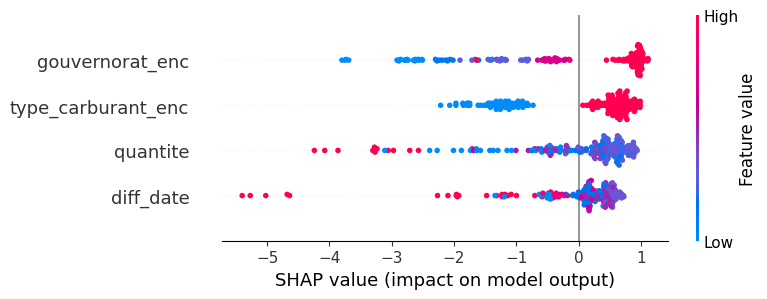

In [356]:
shap.summary_plot(shap_values,sub_mat,feature_names=feature_names)


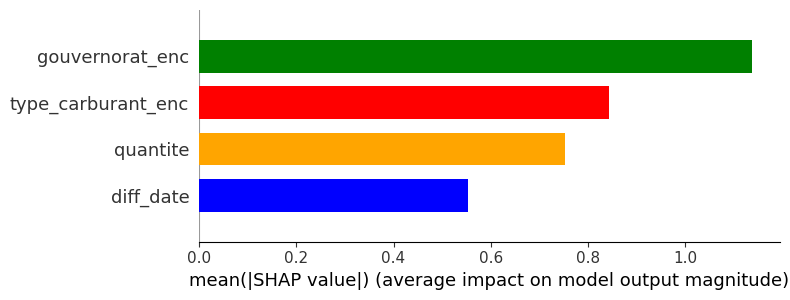

In [357]:
shap.summary_plot(shap_values, sub_mat, plot_type="bar",color = ["blue","orange","red","green"])

### <font color ='maroon'>Model Local Explanation - SHAP</font>

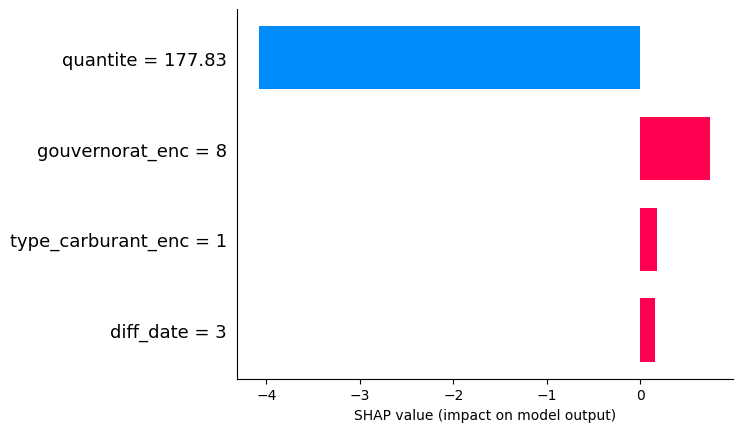

In [367]:
observation_index = 210
shap_values1 = explainer.shap_values(sub_mat.iloc[210,:])
shap.bar_plot(shap_values1,sub_mat.iloc[observation_index,:])
plt.show()

**Dans ce cas, les valeurs SHAP retournés par SHAP peuvent être interprétés comme suit :**

* Valeur positive d'une caractéristique : pousser le modèle à prédire la transaction comme normale

* Valeur négative d'une caractéristique : pousser le modèle à prédire la transaction comme anomalie
